In [187]:
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

In [189]:
controlEmbeddingsWithId = pd.read_csv('pathwayEmbeddingsControls.csv', sep=',', header=0).dropna()
controlEmbeddings = controlEmbeddingsWithId.drop(["id","pathway_id"],axis=1)
basalEmbeddingsWithId = pd.read_csv('pathwayEmbeddingsTumorBasal113New.csv', sep=',', header=0).dropna()
basalEmbeddingsWithIdFiltered = basalEmbeddingsWithId[~basalEmbeddingsWithId['pathway_id'].isin(set(basalEmbeddingsWithId["pathway_id"]).difference(set(controlEmbeddingsWithId["pathway_id"])))]
basalEmbeddings = basalEmbeddingsWithIdFiltered.drop(["id","pathway_id"],axis=1)
LumAEmbeddingsWithId = pd.read_csv('pathwayEmbeddingsTumorLumA113New.csv', sep=',', header=0).dropna()
LumAEmbeddingsWithIdFiltered = LumAEmbeddingsWithId[~LumAEmbeddingsWithId['pathway_id'].isin(set(LumAEmbeddingsWithId["pathway_id"]).difference(set(controlEmbeddingsWithId["pathway_id"])))]
LumAEmbeddings = LumAEmbeddingsWithIdFiltered.drop(["id","pathway_id"],axis=1)
LumBEmbeddingsWithId = pd.read_csv('pathwayEmbeddingsTumorLumB113New.csv', sep=',', header=0).dropna()
LumBEmbeddingsWithIdFiltered = LumBEmbeddingsWithId[~LumBEmbeddingsWithId['pathway_id'].isin(set(LumBEmbeddingsWithId["pathway_id"]).difference(set(controlEmbeddingsWithId["pathway_id"])))]
LumBEmbeddings = LumBEmbeddingsWithIdFiltered.drop(["id","pathway_id"],axis=1)

In [190]:
controlEmbeddings

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,112
0,-0.001864,-0.001324,-0.000723,-0.003979,-0.011037,-0.007056,-0.002351,-0.004459,-0.021360,-0.008809,...,-0.000208,-0.002568,-0.002259,-0.007833,-0.001136,-0.008971,-0.001789,-0.001477,-0.001284,-0.004332
1,-0.002426,-0.001340,-0.001045,-0.004201,-0.012533,-0.008876,-0.002859,-0.005409,-0.024896,-0.010152,...,-0.000436,-0.002670,-0.002526,-0.009201,-0.001441,-0.009750,-0.001511,-0.001890,-0.001464,-0.005524
2,-0.002575,-0.001200,-0.001035,-0.003873,-0.010635,-0.007583,-0.002191,-0.004486,-0.021188,-0.008526,...,-0.000463,-0.003190,-0.001494,-0.007203,-0.001087,-0.009073,-0.001620,-0.001242,-0.001434,-0.004609
3,-0.003493,-0.000755,-0.001101,-0.004443,-0.007395,-0.004756,-0.001841,-0.001691,-0.017472,-0.006212,...,-0.000838,-0.002415,-0.001946,-0.003811,-0.000936,-0.010639,-0.001075,-0.000764,-0.001388,-0.003416
4,-0.003258,-0.001157,-0.001393,-0.004688,-0.009175,-0.005571,-0.001749,-0.002641,-0.019524,-0.007269,...,-0.000664,-0.003218,-0.001813,-0.005123,-0.000913,-0.010895,-0.001763,-0.000850,-0.001794,-0.003598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,-0.002129,-0.001492,-0.000868,-0.004024,-0.011750,-0.007828,-0.002335,-0.004956,-0.022754,-0.009310,...,-0.000371,-0.003087,-0.001903,-0.008289,-0.001213,-0.009307,-0.001887,-0.001500,-0.001613,-0.004810
222,-0.003550,-0.001053,-0.001416,-0.004719,-0.008204,-0.004976,-0.001647,-0.002134,-0.018348,-0.006630,...,-0.000826,-0.002958,-0.001842,-0.004320,-0.001128,-0.011112,-0.001476,-0.000871,-0.001563,-0.003382
223,-0.002319,-0.001260,-0.001203,-0.003856,-0.009317,-0.005888,-0.001735,-0.003330,-0.018454,-0.007287,...,-0.000434,-0.002984,-0.001591,-0.005971,-0.000859,-0.008581,-0.001623,-0.000957,-0.001530,-0.003503
224,-0.002027,-0.000773,0.000668,0.002025,-0.013546,-0.008493,-0.004014,-0.007542,-0.023885,-0.010126,...,-0.000958,-0.002823,-0.002184,-0.010644,-0.000077,-0.009396,-0.000233,-0.002819,-0.003512,-0.006407


In [191]:
tfControlEmbeddings = tf.convert_to_tensor(controlEmbeddings)
tfBasalEmbeddings = tf.convert_to_tensor(basalEmbeddings)
tfLumAEmbeddings = tf.convert_to_tensor(LumAEmbeddings)
tfLumBEmbeddings = tf.convert_to_tensor(LumBEmbeddings)

In [192]:
@tf.function
def rows_distance(tfTensor1,tfTensor2):
    return tf.map_fn( lambda row: tf.sqrt(tf.reduce_sum(row)) ,tf.square(tfTensor1)+tf.square(tfTensor2))

distanceControlsBasal = rows_distance(tfControlEmbeddings,tfBasalEmbeddings)
distanceControlsBasal

<tf.Tensor: shape=(225,), dtype=float64, numpy=
array([0.05214878, 0.05894468, 0.05166358, 0.04950143, 0.05429771,
       0.05554422, 0.05547231, 0.05473282, 0.05973857, 0.05788983,
       0.05786804, 0.05920289, 0.06046772, 0.05075574, 0.06058029,
       0.05817315, 0.06161046, 0.05273865, 0.05507544, 0.05732136,
       0.0467281 , 0.05570858, 0.05413795, 0.06068834, 0.05084658,
       0.05252122, 0.04262166, 0.05359449, 0.0549159 , 0.04444029,
       0.0552147 , 0.06033297, 0.06144163, 0.05406853, 0.05722641,
       0.05993561, 0.05621359, 0.05861063, 0.0564023 , 0.05860463,
       0.04385589, 0.05076732, 0.0509396 , 0.04403048, 0.04506316,
       0.05663849, 0.04736614, 0.0601992 , 0.0561128 , 0.06054651,
       0.05919639, 0.05450626, 0.05589457, 0.04649116, 0.05881578,
       0.052811  , 0.05640466, 0.04574889, 0.05278247, 0.04095075,
       0.04467586, 0.05955109, 0.05815997, 0.06278399, 0.05733956,
       0.05651926, 0.06031245, 0.05557084, 0.05579947, 0.05492006,
       0.05381

In [193]:
pdDistanceControlBasal = pd.DataFrame({'id':range(0,distanceControlsBasal.shape[0]),
                      'distances':distanceControlsBasal.numpy()}) 

In [194]:
distanceControlsLumA = rows_distance(tfControlEmbeddings,tfLumAEmbeddings)
pdDistanceControlLumA = pd.DataFrame({'id':range(0,distanceControlsLumA.shape[0]),
                      'distances':distanceControlsLumA.numpy()}) 
distanceControlsLumB = rows_distance(tfControlEmbeddings,tfLumBEmbeddings)
pdDistanceControlLumB = pd.DataFrame({'id':range(0,distanceControlsLumB.shape[0]),
                      'distances':distanceControlsLumB.numpy()}) 
distanceBasalLumA = rows_distance(tfBasalEmbeddings,tfLumAEmbeddings)
pdDistanceBasalLumA = pd.DataFrame({'id':range(0,distanceBasalLumA.shape[0]),
                      'distances':distanceBasalLumA.numpy()}) 
distanceBasalLumB = rows_distance(tfBasalEmbeddings,tfLumBEmbeddings)
pdDistanceBasalLumB = pd.DataFrame({'id':range(0,distanceControlsLumA.shape[0]),
                      'distances':distanceBasalLumB.numpy()}) 
distanceLumALumB = rows_distance(tfLumAEmbeddings,tfLumBEmbeddings)
pdDistanceLumALumB = pd.DataFrame({'id':range(0,distanceControlsLumA.shape[0]),
                      'distances':distanceLumALumB.numpy()}) 

# control - basal

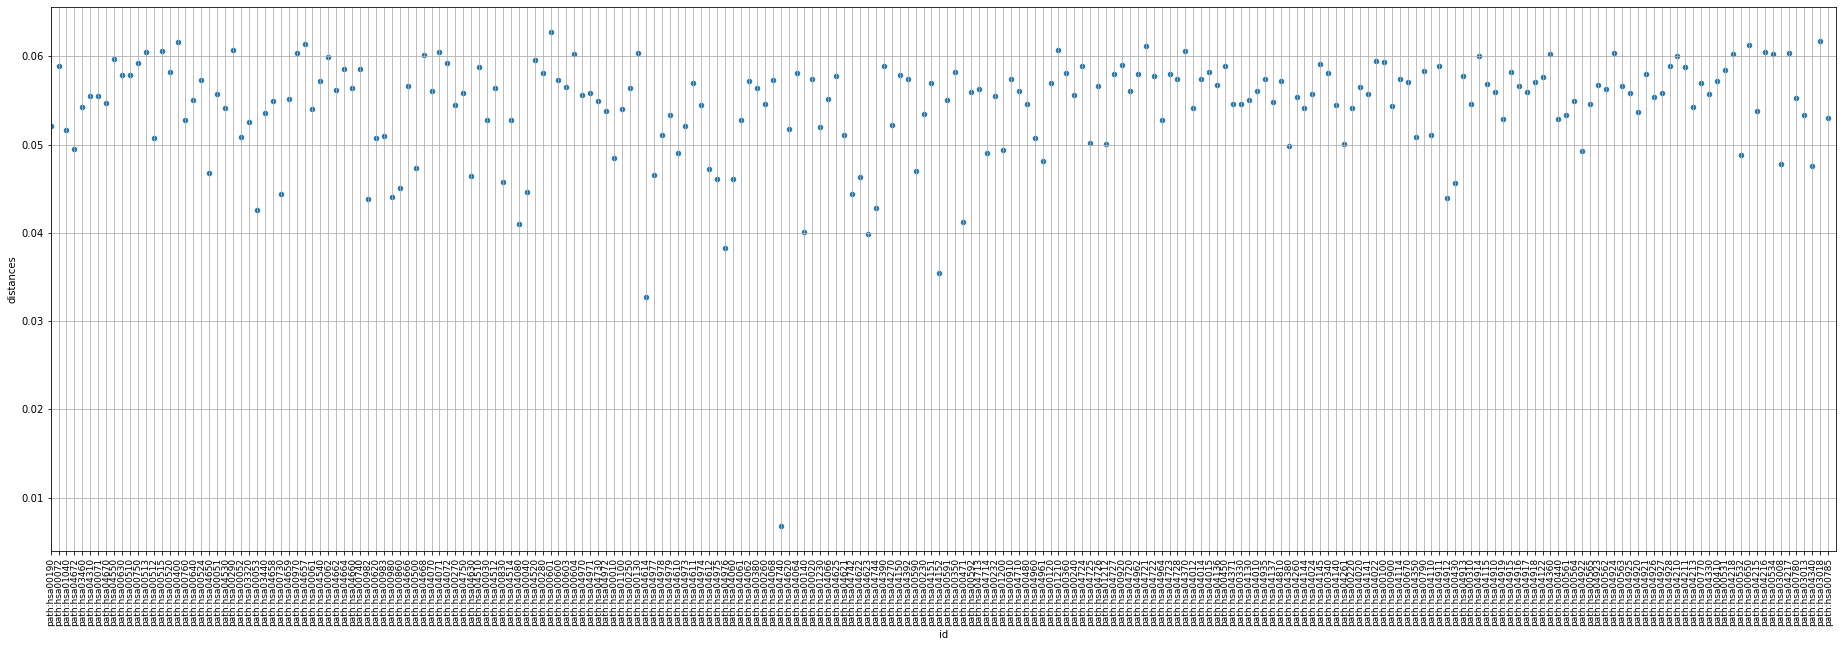

In [195]:
plotd = pdDistanceControlBasal.plot(x="id",y="distances",kind='scatter',figsize=[32,10],grid=True,xticks=pdDistanceControlLumA["id"],rot=90)
plotd.set_xlim([0,225])
plotd.set_xticklabels(basalEmbeddingsWithIdFiltered["pathway_id"], rotation=90)
plotd.tick_params(axis='x',labelsize=9)

# control - LumA

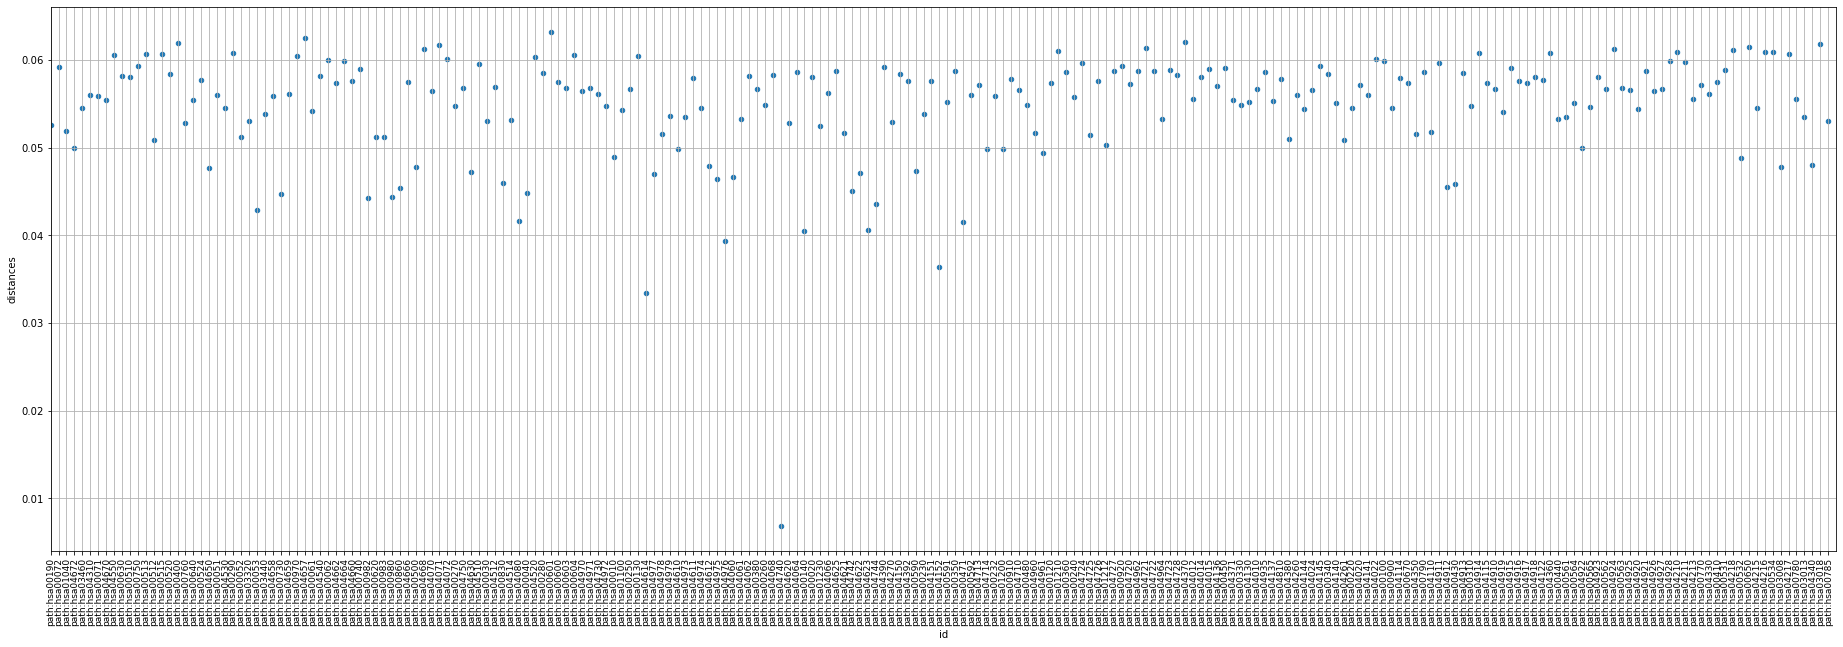

In [196]:
plotd = pdDistanceControlLumA.plot(x="id",y="distances",kind='scatter',figsize=[32,10],grid=True,xticks=pdDistanceControlLumA["id"],rot=90)
plotd.set_xlim([0,225])
plotd.set_xticklabels(basalEmbeddingsWithIdFiltered["pathway_id"], rotation=90)
plotd.tick_params(axis='x',labelsize=9)

# control - LumB

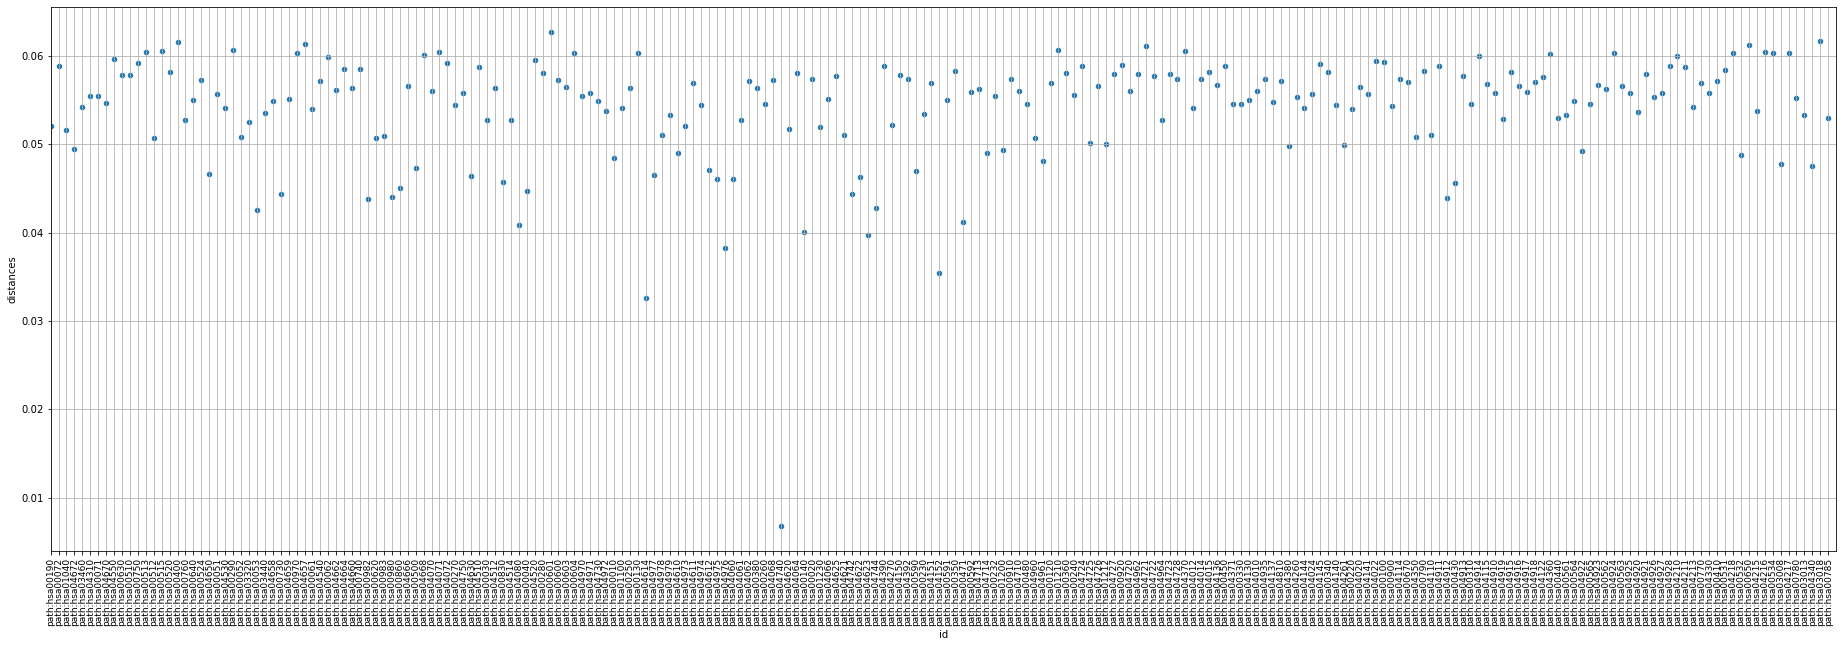

In [197]:
plotd = pdDistanceControlLumB.plot(x="id",y="distances",kind='scatter',figsize=[32,10],grid=True,xticks=pdDistanceControlLumA["id"],rot=90)
plotd.set_xlim([0,225])
plotd.set_xticklabels(basalEmbeddingsWithIdFiltered["pathway_id"], rotation=90)
plotd.tick_params(axis='x',labelsize=9)

# controls distances plot

(0.0, 225.0)

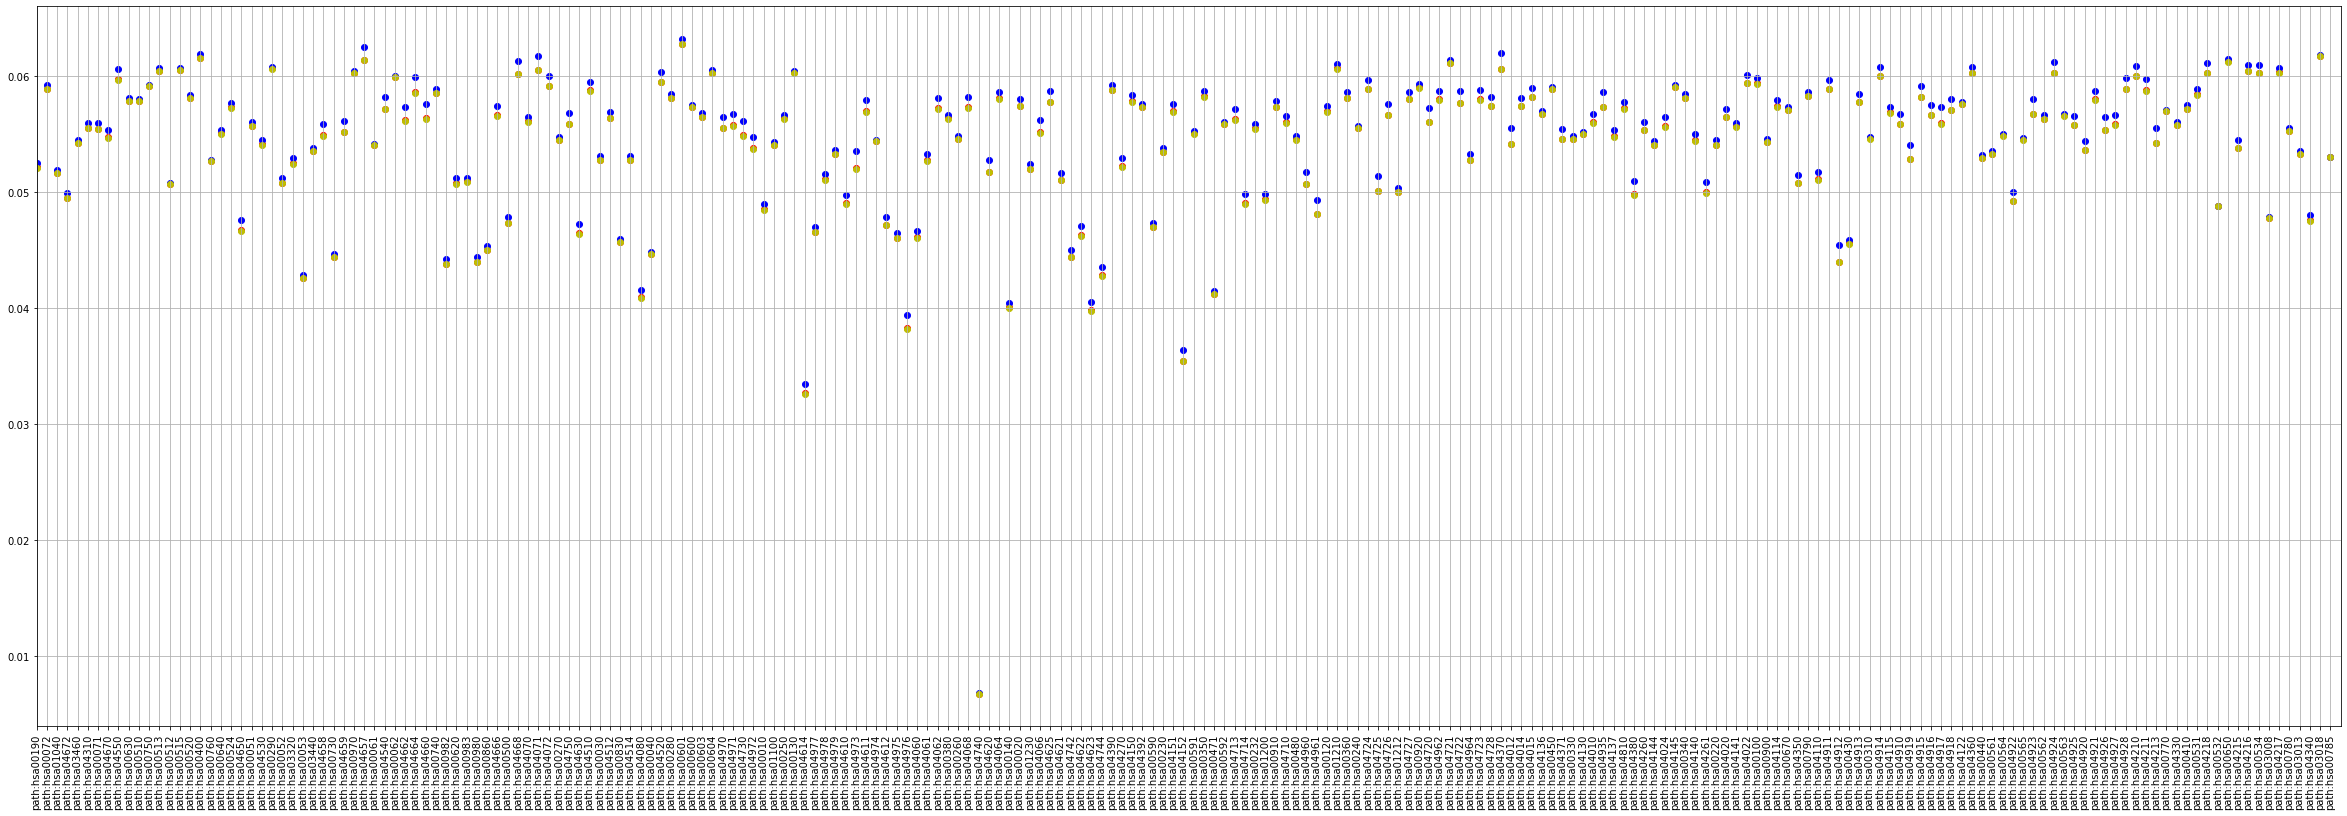

In [198]:
import itertools

ys = [pdDistanceControlBasal["distances"],
      pdDistanceControlLumA["distances"],
      pdDistanceControlLumB["distances"]]

colors = itertools.cycle(["r", "b", "y"])
fig = plt.figure(figsize=[32,10])
ax=fig.add_axes([0,0,1,1])
for y in ys:
    ax.scatter(pdDistanceControlLumA["id"], y, color=next(colors))
ax.grid(which="both")
plt.xticks(pdDistanceControlLumA["id"])
ax.set_xticklabels(basalEmbeddingsWithIdFiltered["pathway_id"], rotation=90)
plt.xlim([0,225])

# LumA - LumB

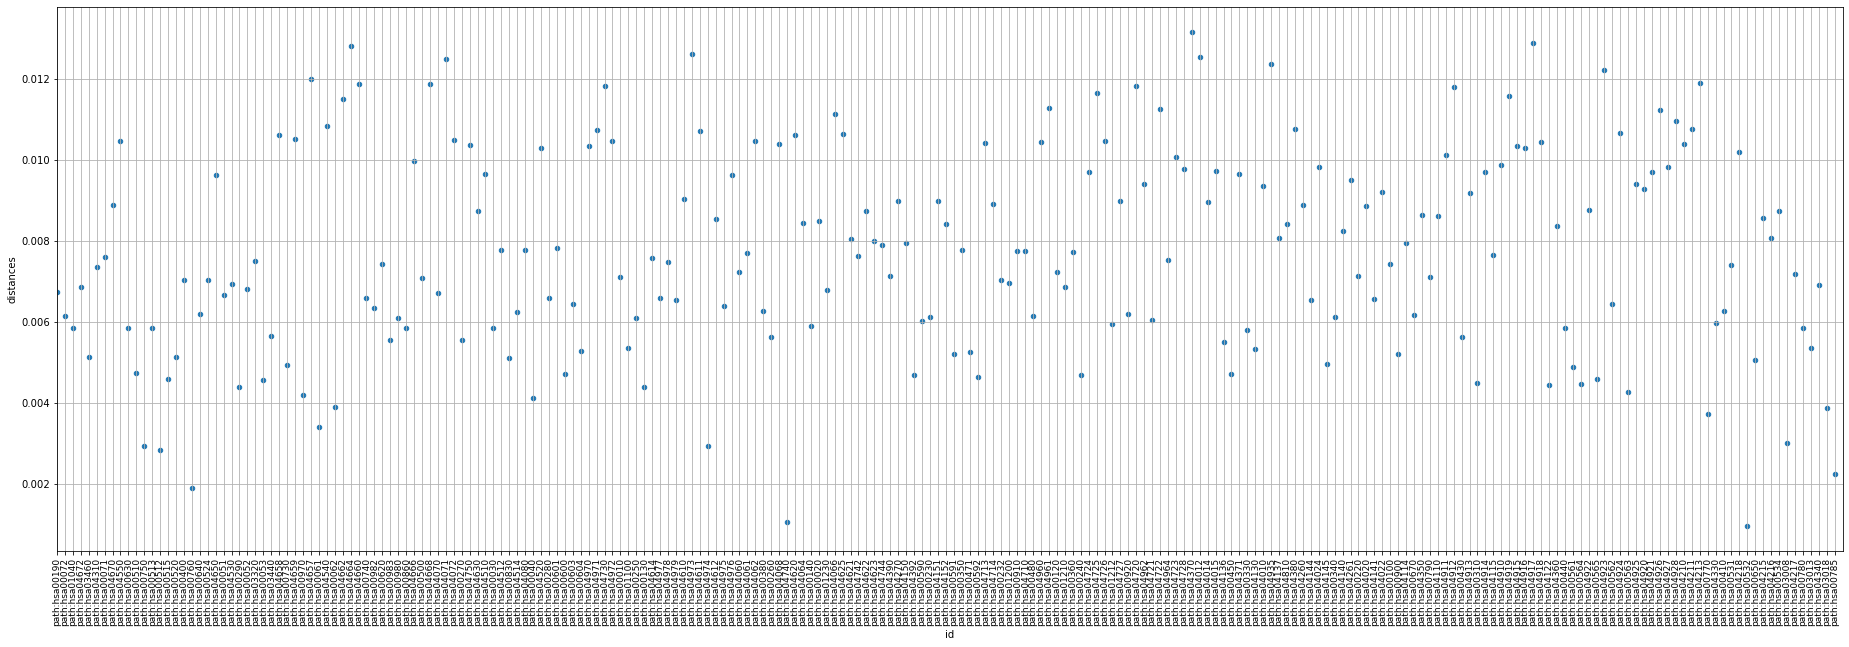

In [199]:
plotd = pdDistanceLumALumB.plot(x="id",y="distances",kind='scatter',figsize=[32,10],grid=True,xticks=pdDistanceControlLumA["id"],rot=90)
plotd.set_xlim([0,225])
plotd.set_xticklabels(basalEmbeddingsWithIdFiltered["pathway_id"], rotation=90)
plotd.tick_params(axis='x',labelsize=9)

# Basal - LumB

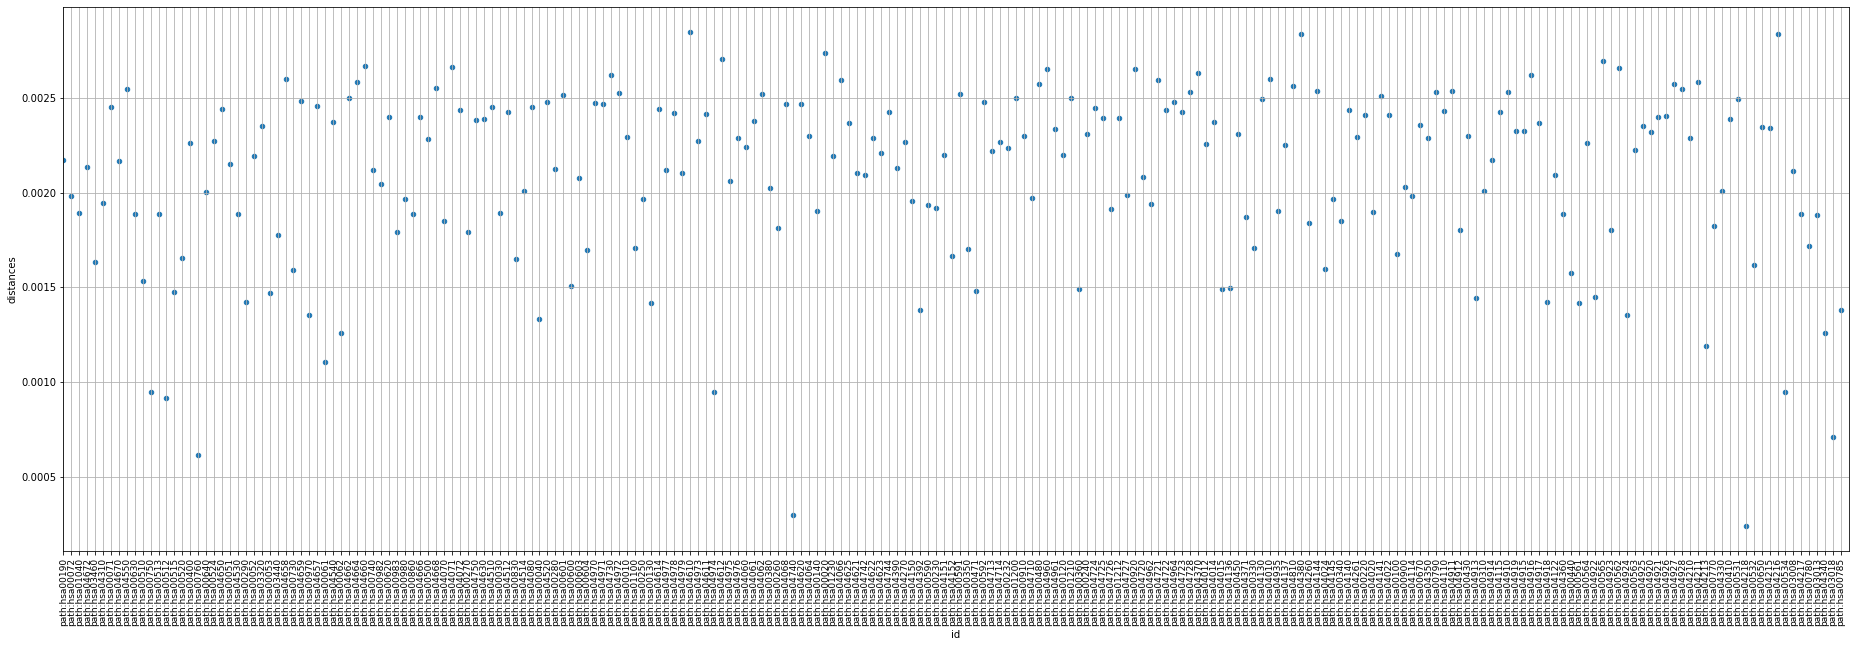

In [200]:
plotd = pdDistanceBasalLumB.plot(x="id",y="distances",kind='scatter',figsize=[32,10],grid=True,xticks=pdDistanceControlLumA["id"],rot=90)
plotd.set_xlim([0,225])
plotd.set_xticklabels(basalEmbeddingsWithIdFiltered["pathway_id"], rotation=90)
plotd.tick_params(axis='x',labelsize=9)

# Basal - LumA

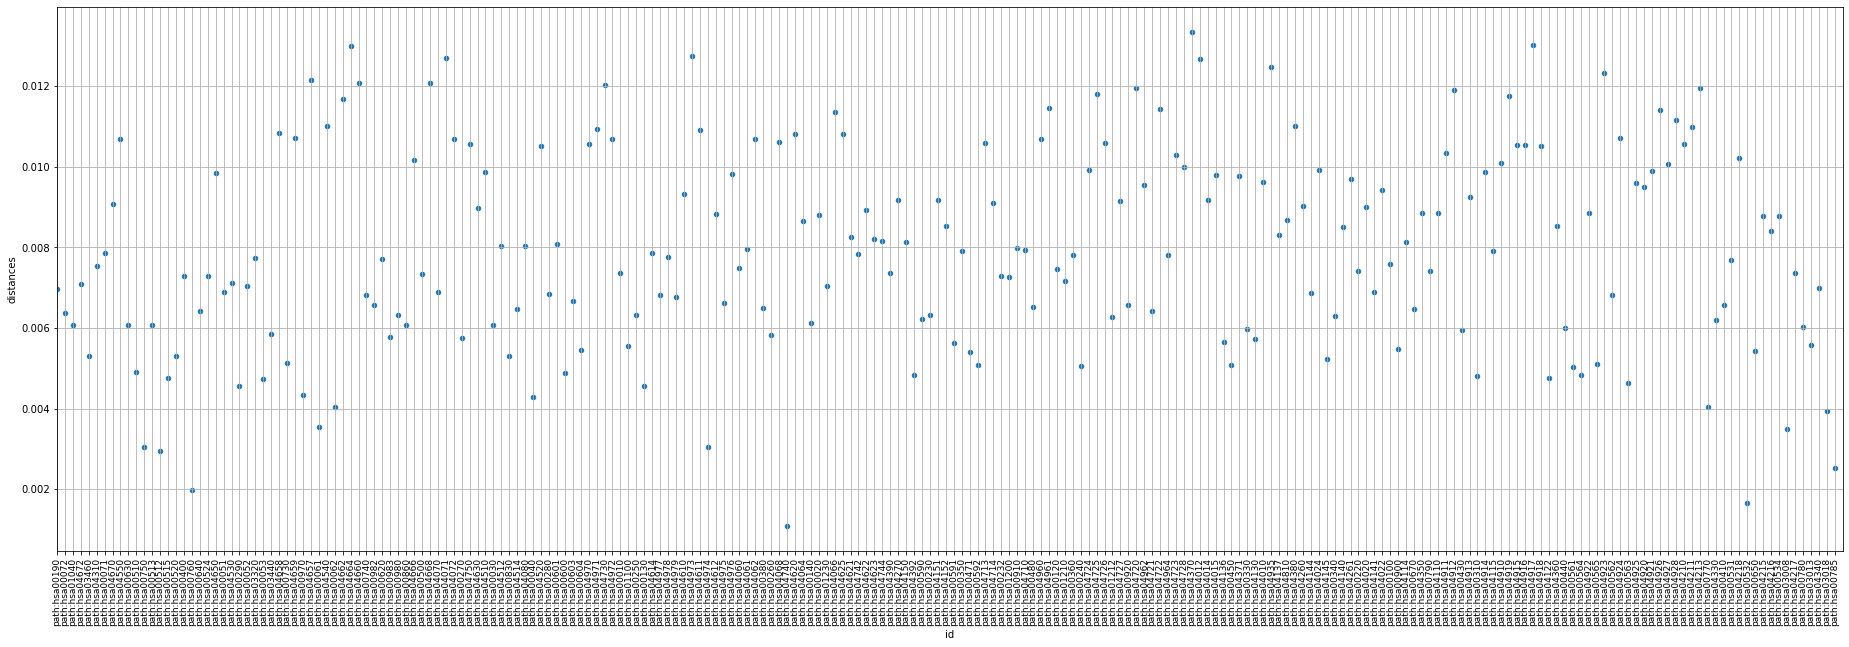

In [201]:
plotd = pdDistanceBasalLumA.plot(x="id",y="distances",kind='scatter',figsize=[32,10],grid=True,xticks=pdDistanceControlLumA["id"],rot=90)
plotd.set_xlim([0,225])
plotd.set_xticklabels(basalEmbeddingsWithIdFiltered["pathway_id"], rotation=90)
plotd.tick_params(axis='x',labelsize=9)

(0.0, 225.0)

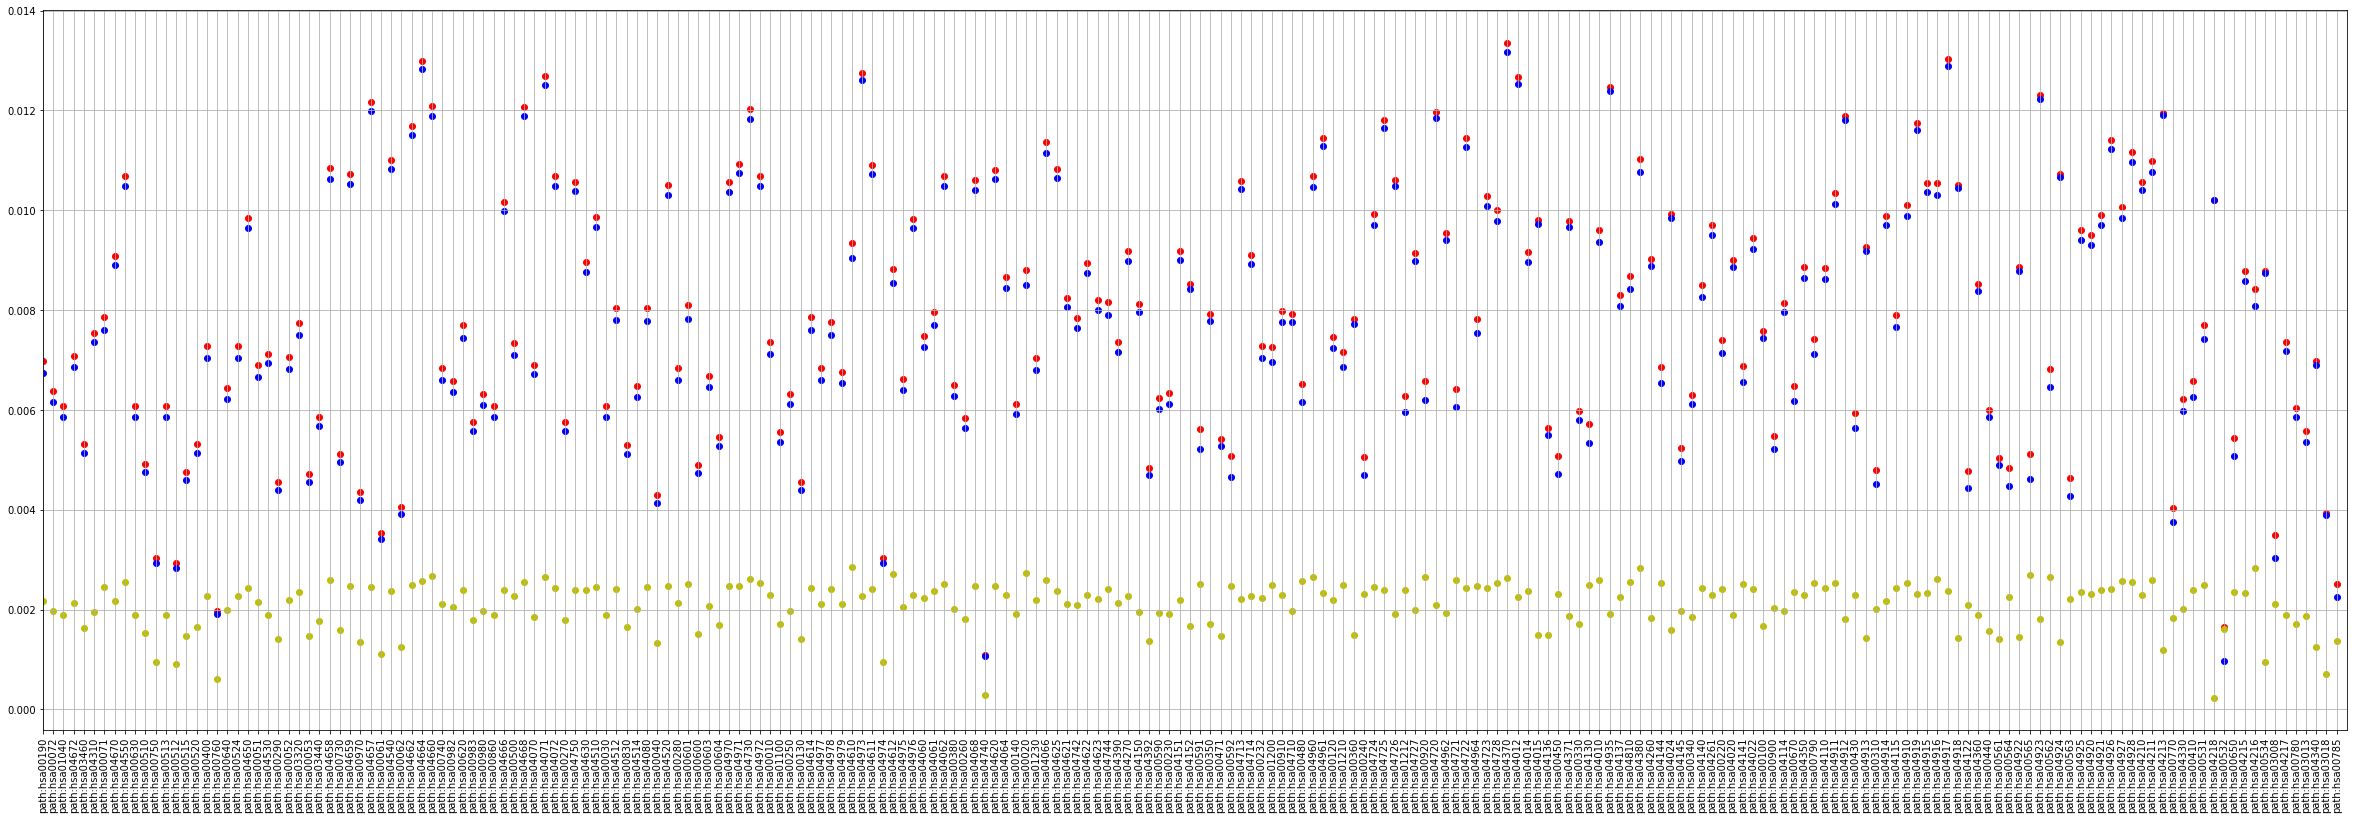

In [202]:

ys = [pdDistanceBasalLumA["distances"],
      pdDistanceLumALumB["distances"],
      pdDistanceBasalLumB["distances"]]

colors = itertools.cycle(["r", "b", "y"])
fig = plt.figure(figsize=[32,10])
ax=fig.add_axes([0,0,1,1])
for y in ys:
    ax.scatter(pdDistanceControlLumA["id"], y, color=next(colors))
ax.grid(which="both")
plt.xticks(pdDistanceControlLumA["id"])
ax.set_xticklabels(basalEmbeddingsWithIdFiltered["pathway_id"], rotation=90)
plt.xlim([0,225])